In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
pollution = pd.read_csv(
    'https://raw.githubusercontent.com/owid/owid-datasets/master/datasets/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011)/Air%20pollution%20by%20city%20-%20Fouquet%20and%20DPCC%20(2011).csv'
)

In [10]:
len(pollution)

331

In [44]:
pollution = pollution.rename(columns={
        'Suspended Particulate Matter (SPM) (Fouquet and DPCC (2011))': 'SPM',
        'Smoke (Fouquet and DPCC (2011))' : 'Smoke',
            'Entity': 'City'
}
)
pollution

,City,Year,Smoke,SPM
0,Delhi,1997,NaN,363.0
1,Delhi,1998,NaN,378.0
2,Delhi,1999,NaN,375.0
3,Delhi,2000,NaN,431.0
4,Delhi,2001,NaN,382.0
...,...,...,...,...
326,London,2012,NaN,17.0
327,London,2013,NaN,17.0
328,London,2014,NaN,17.0
329,London,2015,NaN,15.0


In [14]:
pollution.dtypes

City      object
Year       int64
Smoke    float64
SPM      float64
dtype: object

In [45]:
pollution['Year']=pollution['Year'].apply(
    lambda x: datetime.datetime.strptime(str(x), '%Y')
)
pollution.dtypes

City             object
Year     datetime64[ns]
Smoke           float64
SPM             float64
dtype: object

In [46]:
pollution.isnull().mean()

City     0.000000
Year     0.000000
Smoke    0.090634
SPM      0.000000
dtype: float64

Text(0, 0.5, 'Frequency')

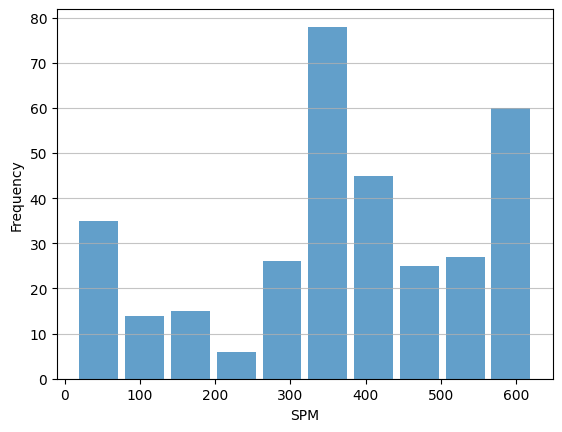

In [19]:
n, bins, patches = plt.hist(
    x=pollution['SPM'], bins='auto',
    alpha=0.7, rwidth=0.85
)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SPM')
plt.ylabel('Frequency')

In [23]:
from scipy import stats

def ignore_nans(a, b):
    index = ~a.isnull() & ~b.isnull()
    return a[index], b[index]

stats.pearsonr(*ignore_nans(pollution['Smoke'], pollution['SPM']))

PearsonRResult(statistic=0.9999999999999999, pvalue=0.0)

In [19]:
temperatures = pd.read_csv("./data/monthly_csv.csv")

In [20]:
temperatures

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


In [22]:
temperatures['Date'] = pd.to_datetime(temperatures['Date'])
temperatures

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292
...,...,...,...
3283,GISTEMP,1880-03-06,-0.1800
3284,GCAG,1880-02-06,-0.1229
3285,GISTEMP,1880-02-06,-0.2100
3286,GCAG,1880-01-06,0.0009


In [23]:
temperatures = temperatures.pivot(index='Date', columns='Source', values='Mean')
temperatures

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14
...,...,...
2016-08-06,0.8998,0.98
2016-09-06,0.8767,0.87
2016-10-06,0.7292,0.89


In [24]:
temperatures['GCAG'].index.month

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
        3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
      dtype='int32', name='Date', length=1644)

In [29]:
from numpy import polyfit

def fit(X, y, degree=3):
    coef = polyfit(X, y, degree)
    trendpoly = np.poly1d(coef)
    return trendpoly(X)

def get_season(s, yearly_periods=4, degree=3):
    X = [i%(365/4) for i in range(0, len(s))]
    seasonal = fit(X, s.values, degree)
    return pd.Series(data=seasonal, index=s.index)

def get_trend(s, degress=3):
    X = list(range(len(s)))
    trend = fit(X, s.values, degress)
    return pd.Series(data=trend, index=s.index)

Text(0, 0.5, 'Temperature change')

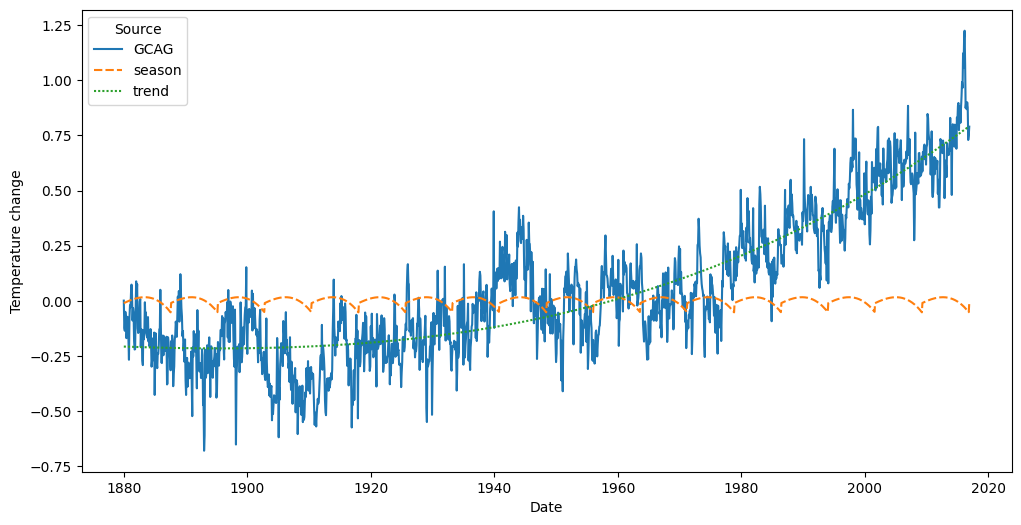

In [30]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 6))
temperatures['trend'] = get_trend(temperatures['GCAG'])
temperatures['season'] = get_season(temperatures['GCAG'] -temperatures['trend'])
sns.lineplot(data = temperatures[['GCAG', 'season', 'trend']])
plt.ylabel('Temperature change')

In [47]:
pollution = pollution.pivot(index="Year",columns="City",values="SPM")

In [48]:
pollution

City,Delhi,London
Year,,
1700-01-01,NaN,259.740260
1701-01-01,NaN,262.337662
1702-01-01,NaN,264.935065
1703-01-01,NaN,267.532467
1704-01-01,NaN,270.129870
...,...,...
2012-01-01,NaN,17.000000
2013-01-01,NaN,17.000000
2014-01-01,NaN,17.000000


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

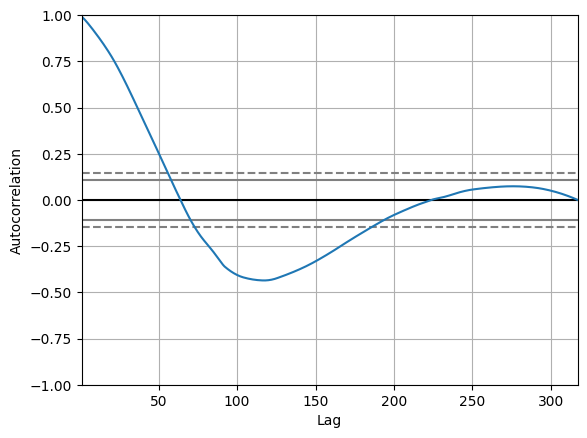

In [50]:
pd.plotting.autocorrelation_plot(pollution['London'])

In [54]:
from statsmodels.tsa import stattools

In [55]:
stattools.adfuller(pollution['London'])

(-0.33721640804242853,
 0.9200654843183897,
 13,
 303,
 {'1%': -3.4521175397304784,
  '5%': -2.8711265007266666,
  '10%': -2.571877823851692},
 1684.699266349387)